In [46]:
# matplotlib library load
import matplotlib.pyplot as plt

# plot 한글 보이게
from matplotlib import rc
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

In [47]:
import numpy as np
covMat = np.array([[0.1, 1], [1, 0.4]])

In [48]:
import numpy as np
import matplotlib.pyplot as plt

def imagQuadratic(covMat):
    # Define the quadratic form
    x = np.linspace(-1, 1, 400)
    y = np.linspace(-1, 1, 400)
    w1, w2 = np.meshgrid(x, y)

    Z = np.empty(w1.shape)
    for i in range(w1.shape[0]):
        for j in range(w1.shape[1]):
            W = np.array([w1[i, j], w2[i, j]])
            Z[i, j] = W.T @ covMat @ W

    # Create the 3D plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the surface
    surf = ax.plot_surface(w1, w2, Z, cmap='viridis', edgecolor='none')

    # Labels and title
    ax.set_xlabel('w1 axis')
    ax.set_ylabel('w2 axis')
    ax.set_zlabel('Z axis')

    # Show the plot
    plt.show()

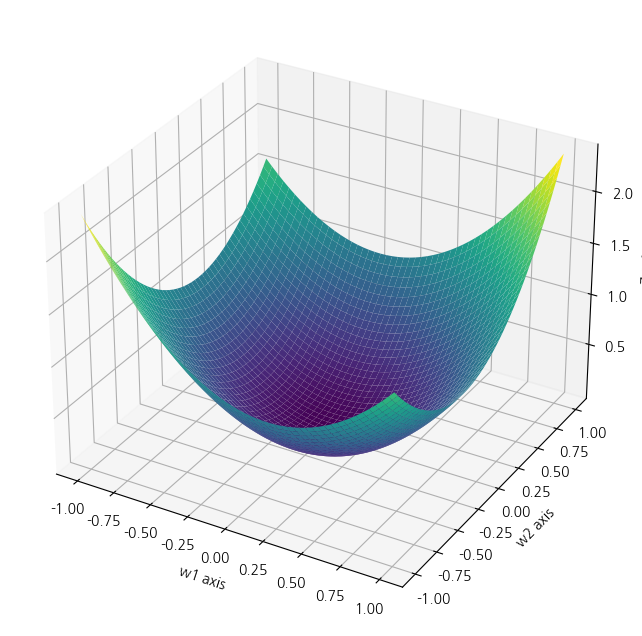

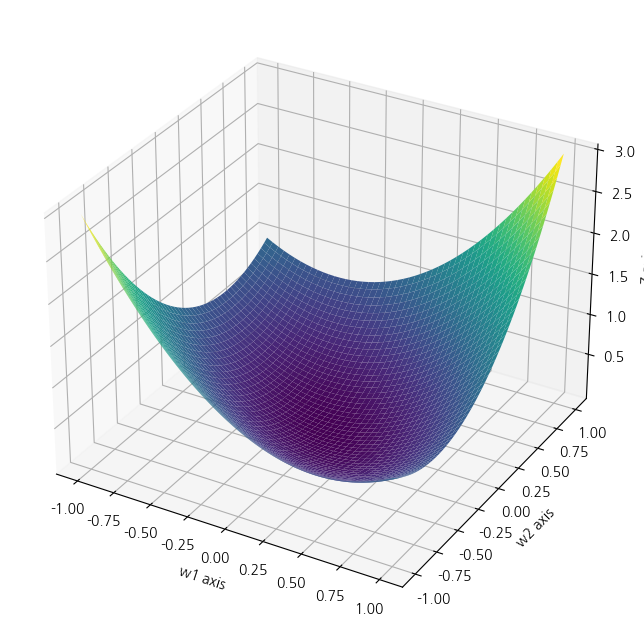

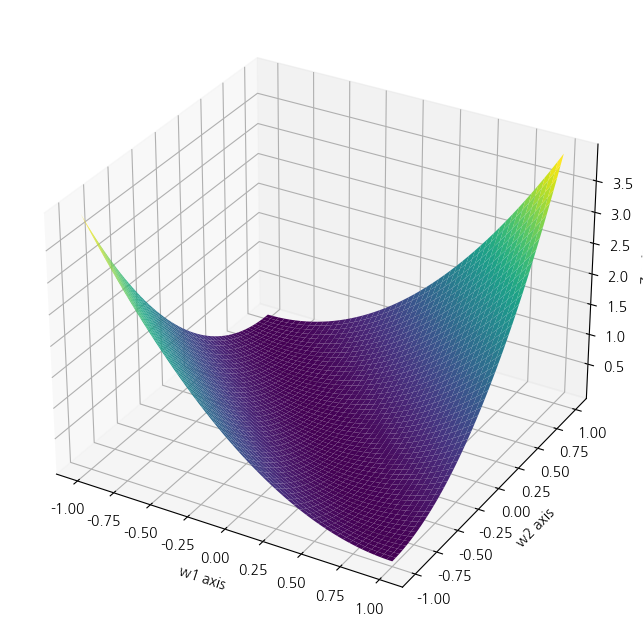

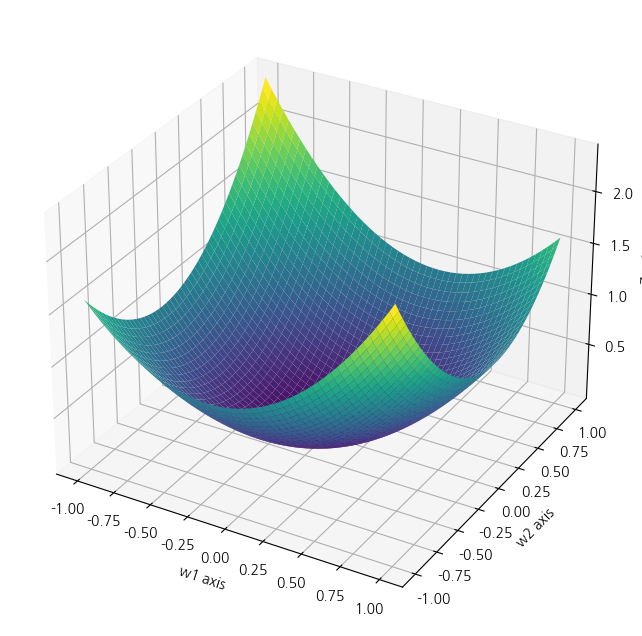

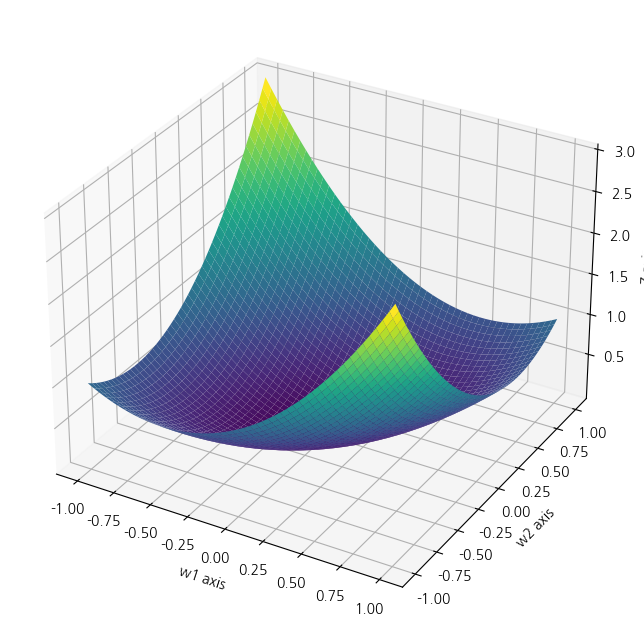

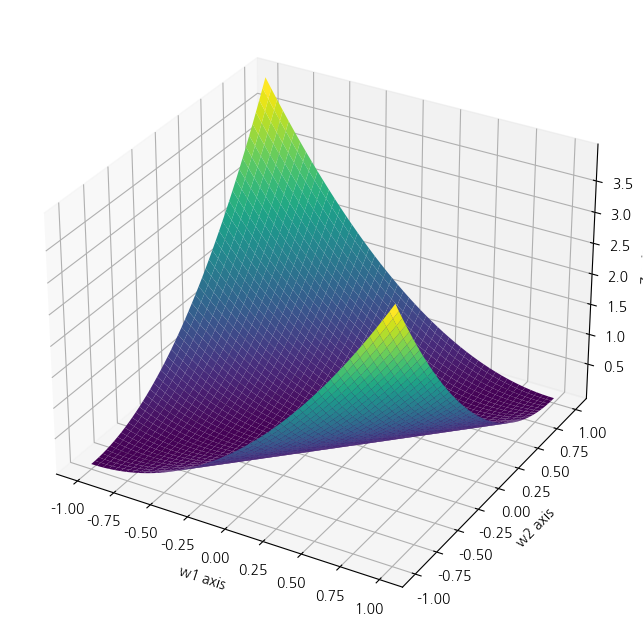

In [49]:
testCovMat1 = np.array([[1, 0.2], [0.2, 1]])
testCovMat2 = np.array([[1, 0.5], [0.5, 1]])
testCovMat3 = np.array([[1, 0.999], [0.999, 1]])

testCovMat4 = np.array([[1, -0.2], [-0.2, 1]])
testCovMat5 = np.array([[1, -0.5], [-0.5, 1]])
testCovMat6 = np.array([[1, -0.999], [-0.999, 1]])

arr = [testCovMat1, testCovMat2, testCovMat3, testCovMat4, testCovMat5, testCovMat6]

for i in arr:
    imagQuadratic(i)

In [50]:
def imagPosQuadratic(covMat):
    # Define the quadratic form
    x = np.linspace(0, 1, 400)
    y = np.linspace(0, 1, 400)
    w1, w2 = np.meshgrid(x, y)

    # There seems to be a typo in the provided subtraction term. Assuming it is:
    # Z = 0.04*X - 0.03*Y (this is subtracted from the quadratic form)

    # Compute Z values for the quadratic form and subtract the given expression
    #Z = covMat[0, 0]*w1**2 + (covMat[0, 1] + covMat[1, 0])*w1*w2 + A[1, 1]*w2**2
    Z = np.empty(w1.shape)
    for i in range(w1.shape[0]):
        for j in range(w1.shape[1]):
            W = np.array([w1[i, j], w2[i, j]])
            Z[i, j] = W.T @ covMat @ W

    # Create the 3D plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    #ax.view_init(elev=0, azim=90)

    # Plot the surface
    surf = ax.plot_surface(w1, w2, Z, cmap='viridis', edgecolor='none')

    # Labels and title
    ax.set_xlabel('w1 axis')
    ax.set_ylabel('w2 axis')
    ax.set_zlabel('Z axis')

    # Show the plot
    plt.show()

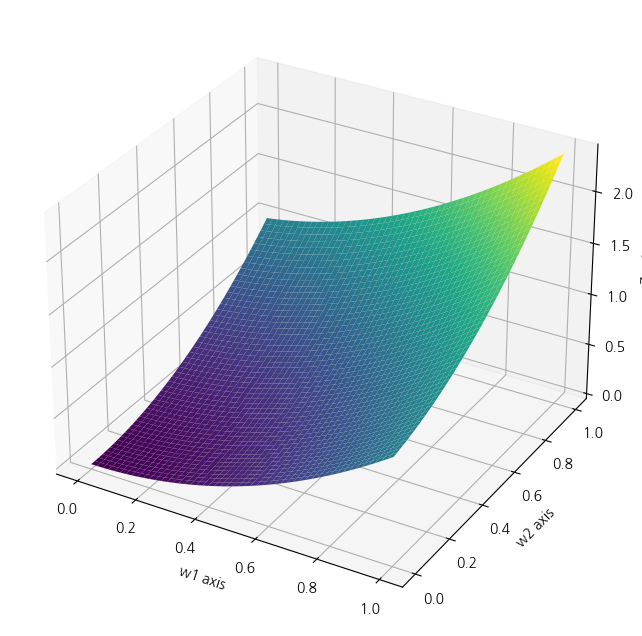

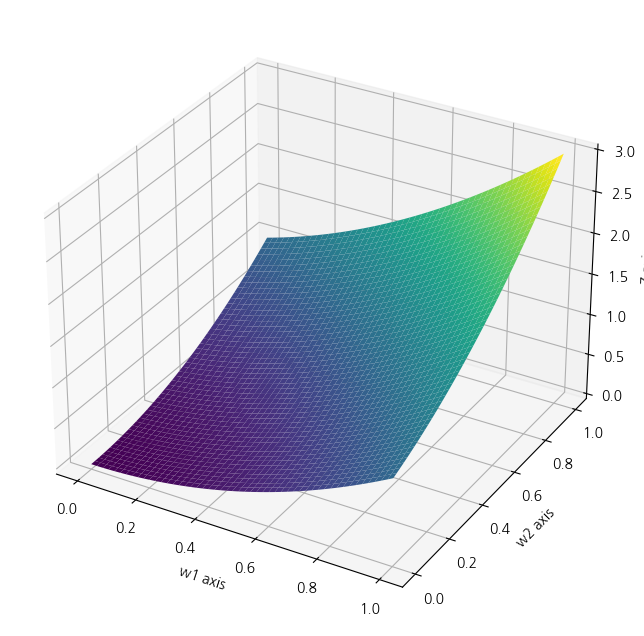

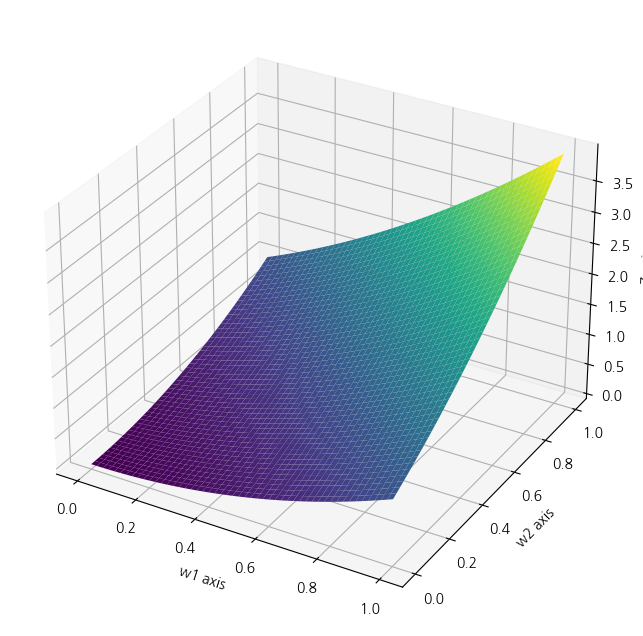

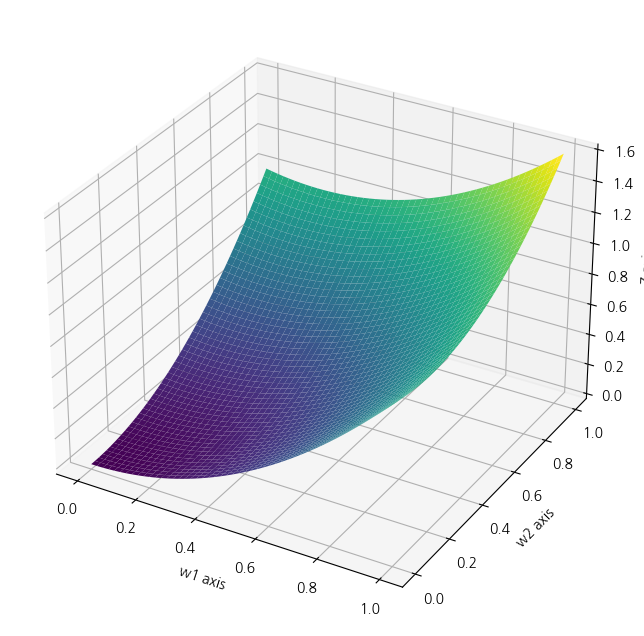

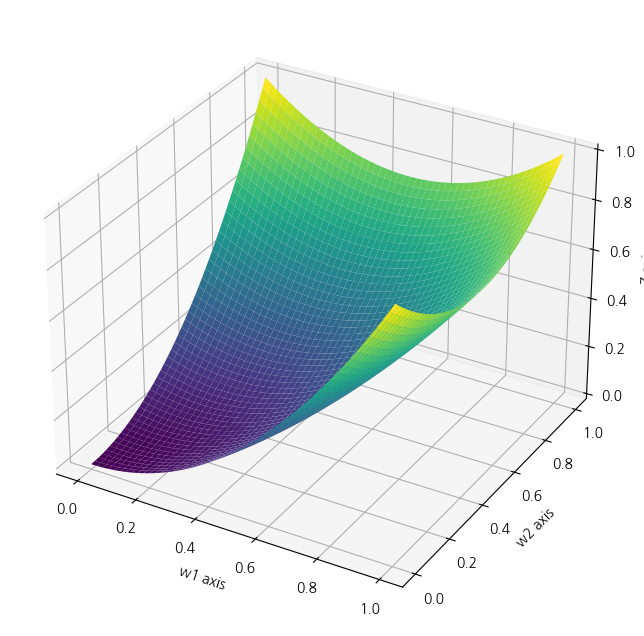

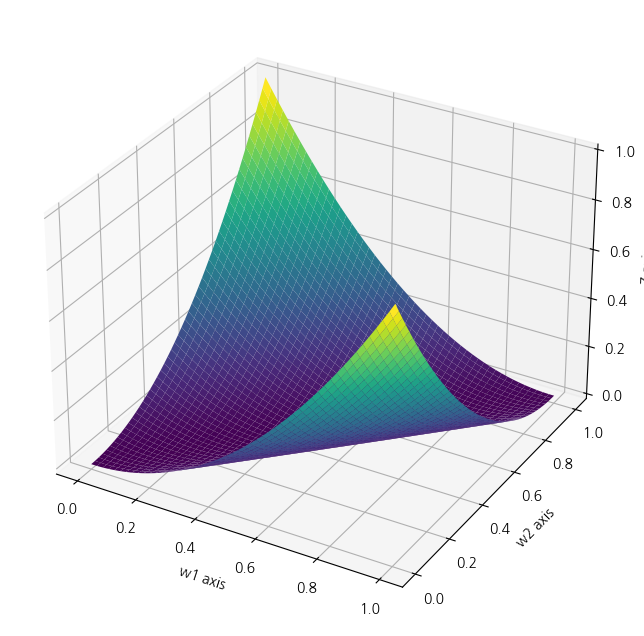

In [51]:
testCovMat1 = np.array([[1, 0.2], [0.2, 1]])
testCovMat2 = np.array([[1, 0.5], [0.5, 1]])
testCovMat3 = np.array([[1, 0.999], [0.999, 1]])

testCovMat4 = np.array([[1, -0.2], [-0.2, 1]])
testCovMat5 = np.array([[1, -0.5], [-0.5, 1]])
testCovMat6 = np.array([[1, -0.999], [-0.99, 1]])


arr = [testCovMat1, testCovMat2, testCovMat3, testCovMat4, testCovMat5, testCovMat6]

for i in arr:
    imagPosQuadratic(i)

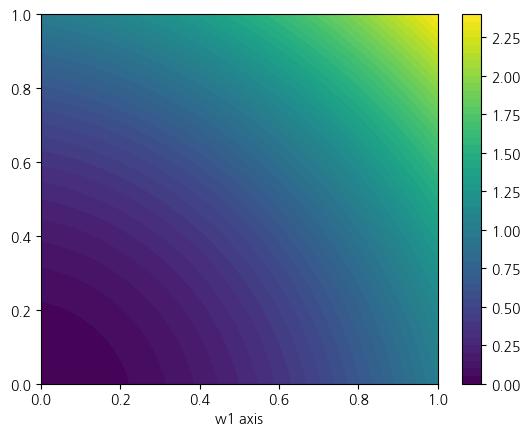

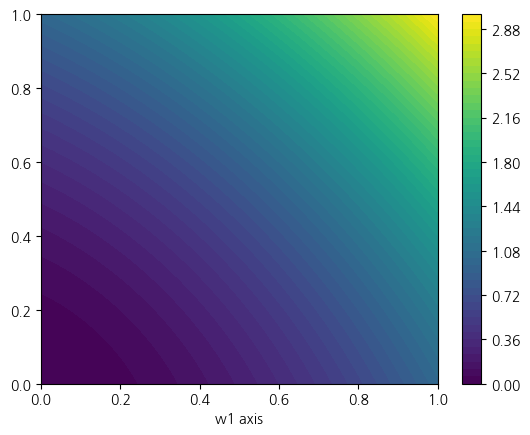

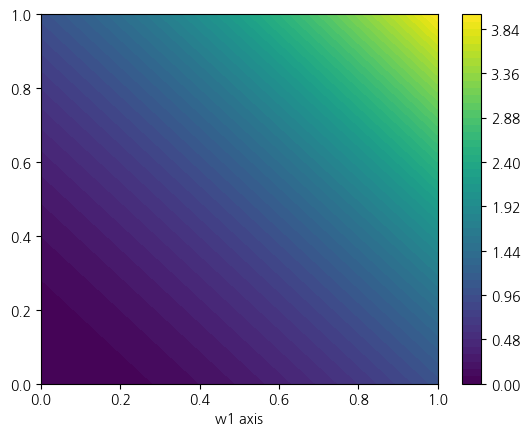

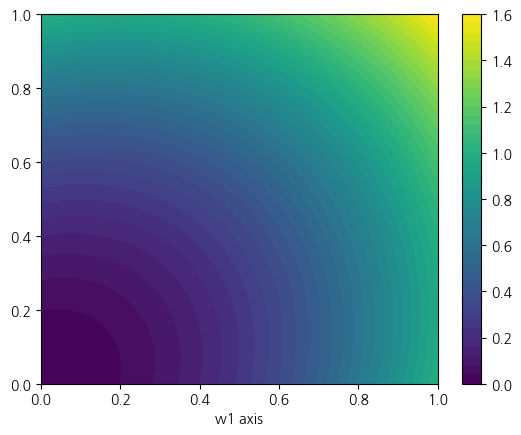

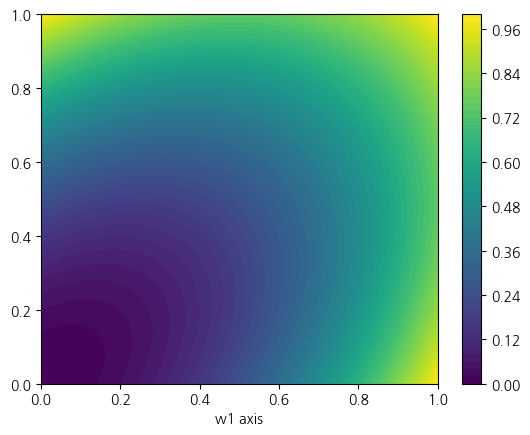

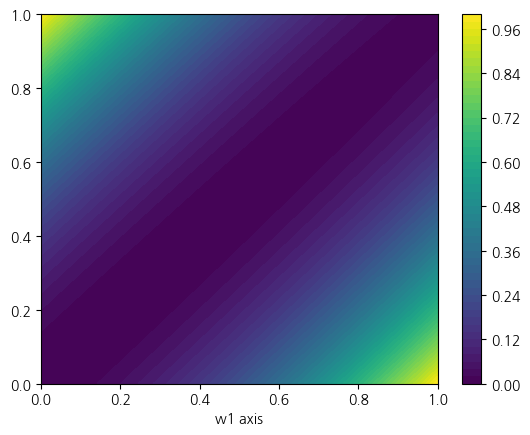

In [52]:
def plot_top_view(covMat):
    x = np.linspace(0, 1, 400)
    y = np.linspace(0, 1, 400)
    w1, w2 = np.meshgrid(x, y)
    Z = np.empty(w1.shape)
    for i in range(w1.shape[0]):
        for j in range(w1.shape[1]):
            W = np.array([w1[i, j], w2[i, j]])
            Z[i, j] = W.T @ covMat @ W

    plt.contourf(w1, w2, Z, levels=50, cmap='viridis')
    plt.colorbar()
    plt.xlabel('w1 axis')
    plt.show()

for i in arr:
    plot_top_view(i)

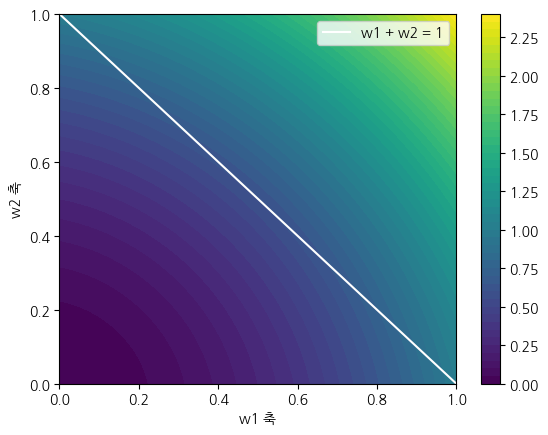

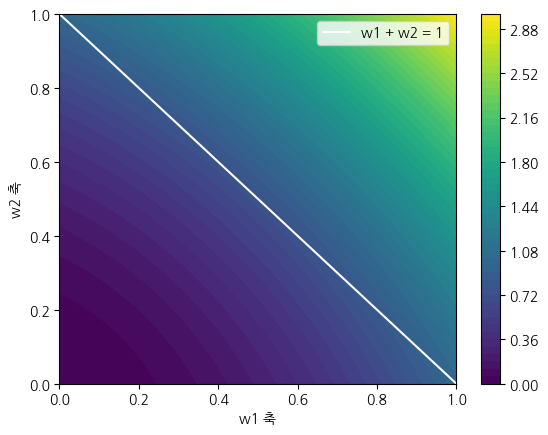

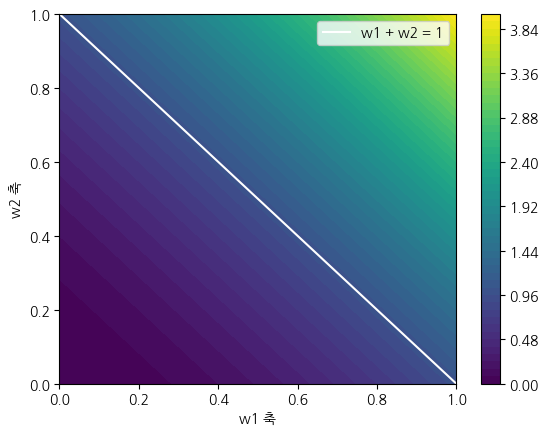

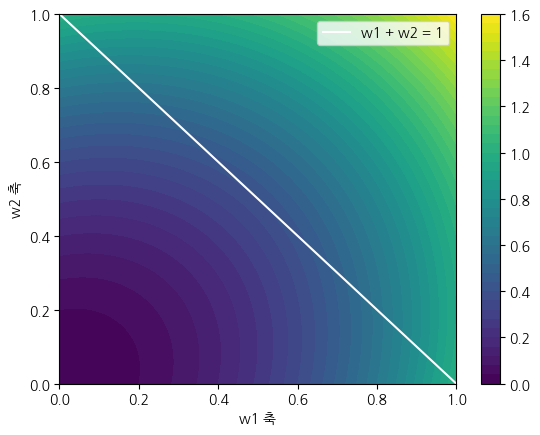

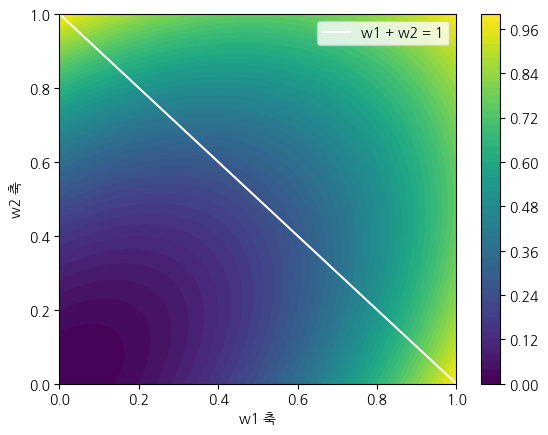

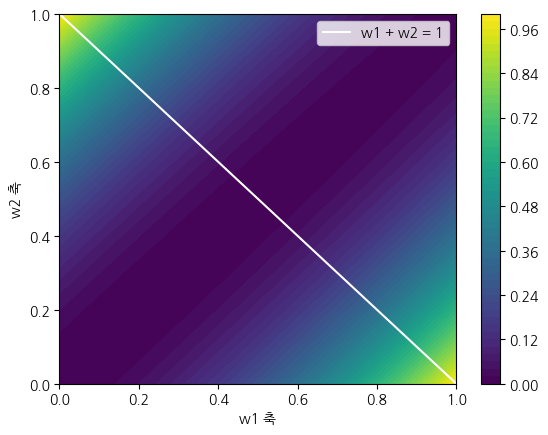

In [53]:
import numpy as np
import matplotlib.pyplot as plt

def plot_top_view(covMat):
    x = np.linspace(0, 1, 400)
    y = np.linspace(0, 1, 400)
    w1, w2 = np.meshgrid(x, y)
    Z = np.empty(w1.shape)
    for i in range(w1.shape[0]):
        for j in range(w1.shape[1]):
            W = np.array([w1[i, j], w2[i, j]])
            Z[i, j] = W.T @ covMat @ W

    # 등고선 플롯 생성
    plt.contourf(w1, w2, Z, levels=50, cmap='viridis')
    plt.colorbar()
    
    # w1 + w2 = 1을 만족하는 선 추가
    plt.plot(x, 1-x, 'w', label='w1 + w2 = 1')  # 'r--'는 빨간색 점선을 의미합니다.
    
    plt.xlabel('w1 축')
    plt.ylabel('w2 축')
    plt.legend()  # 범례 추가
    plt.show()

# arr 배열에 정의된 각 공분산 행렬에 대해 플롯 실행
for i in arr:
    plot_top_view(i)


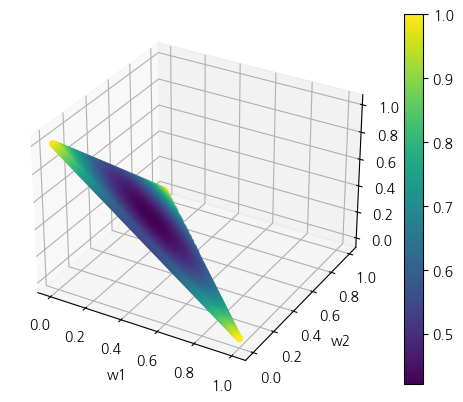

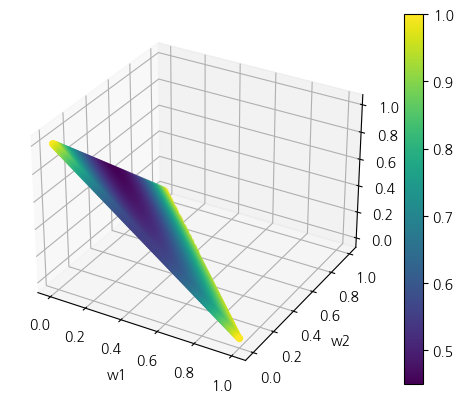

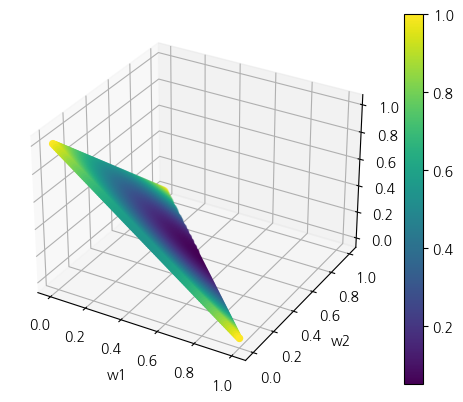

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_view(covMat):
    w1, w2 = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
    w3 = 1 - w1 - w2
    
    valid = w3 >= 0
    w1, w2, w3 = w1[valid], w2[valid], w3[valid]
    
    # 수정된 부분: 튜플을 np.array로 변환
    Z = np.array([np.array([w1, w2, w3]).T @ covMat @ np.array([w1, w2, w3]) for w1, w2, w3 in zip(w1, w2, w3)])
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    img = ax.scatter(w1, w2, w3, c=Z, cmap='viridis')
    fig.colorbar(img)
    
    ax.set_xlabel('w1')
    ax.set_ylabel('w2')
    ax.set_zlabel('w3')
    
    plt.show()

# 3x3 공분산 행렬 예시
testCovMat3x3_1 = np.array([
    [1, 0.2, 0.1],
    [0.2, 1, 0.1],
    [0.1, 0.1, 1]
])

testCovMat3x3_2 = np.array([
    [1, 0.9, 0.1],
    [0.9, 1, -0.1],
    [0.1, -0.1, 1]
])

testCovMat3x3_3 = np.array([
    [1, -0.9, 0.1],
    [-0.9, 1, 0.1],
    [0.1, 0.1, 1]
])

plot_3d_view(testCovMat3x3_1)
plot_3d_view(testCovMat3x3_2)
plot_3d_view(testCovMat3x3_3)